In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('dataset_part_2.csv')

In [18]:
df.columns

Index(['rocket', 'payloads', 'launchpad', 'cores', 'date_utc', 'payload_mass',
       'orbit', 'booster_version', 'launch_site', 'longitude', 'latitude',
       'core_block', 'core_reused_count', 'core_serial', 'core_outcome',
       'core_flights', 'core_gridfins', 'core_reused', 'core_legs',
       'core_landing_pad', 'flight_number', 'landing_class'],
      dtype='object')

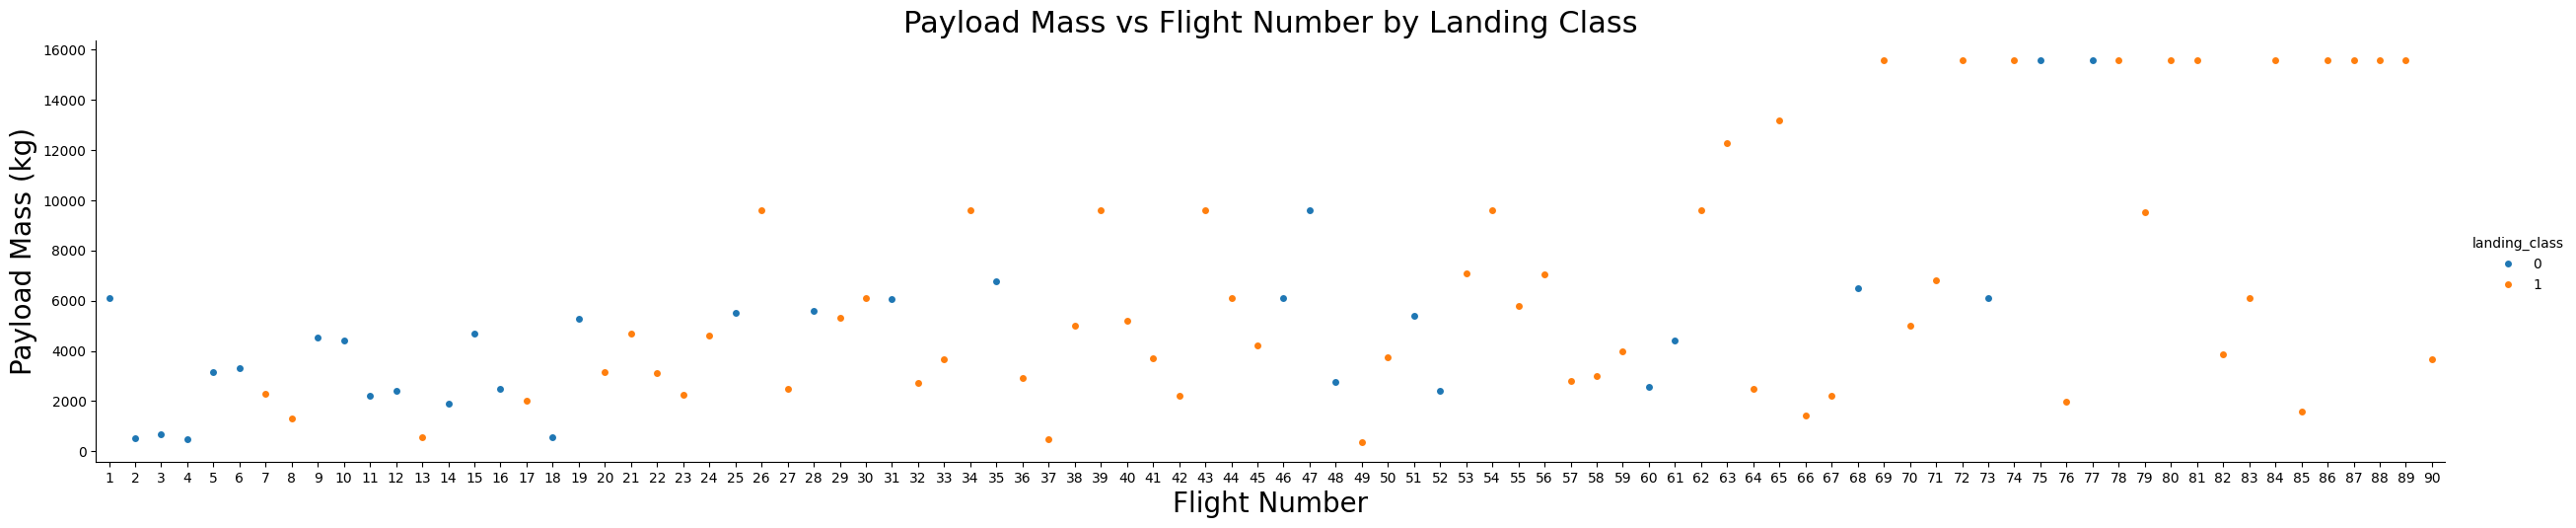

In [20]:
sns.catplot(
    y="payload_mass",
    x="flight_number",
    hue="landing_class",
    data=df,
    kind="strip",
    aspect=5
)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("Payload Mass vs Flight Number by Landing Class", fontsize=22)
plt.show()


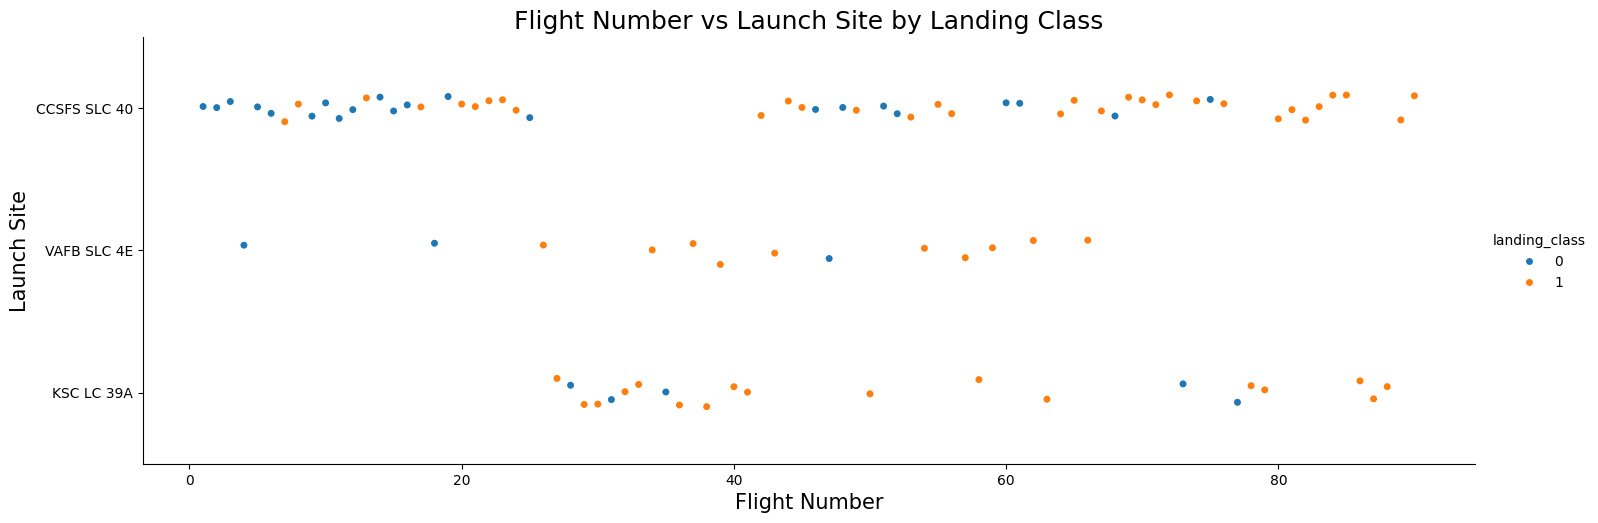

In [24]:
sns.catplot(
    x="flight_number",  # Ensure this matches your dataset
    y="launch_site",    # Ensure this matches your dataset
    hue="landing_class",  # Ensure this matches your dataset
    kind="strip",        # You can use "swarm", "box", "bar", etc.
    data=df,            # Your dataset
    aspect=3,           # Makes the plot wider
    jitter=True,        # Adds jitter to avoid overlapping points
)

plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs Launch Site by Landing Class", fontsize=18)
plt.show()

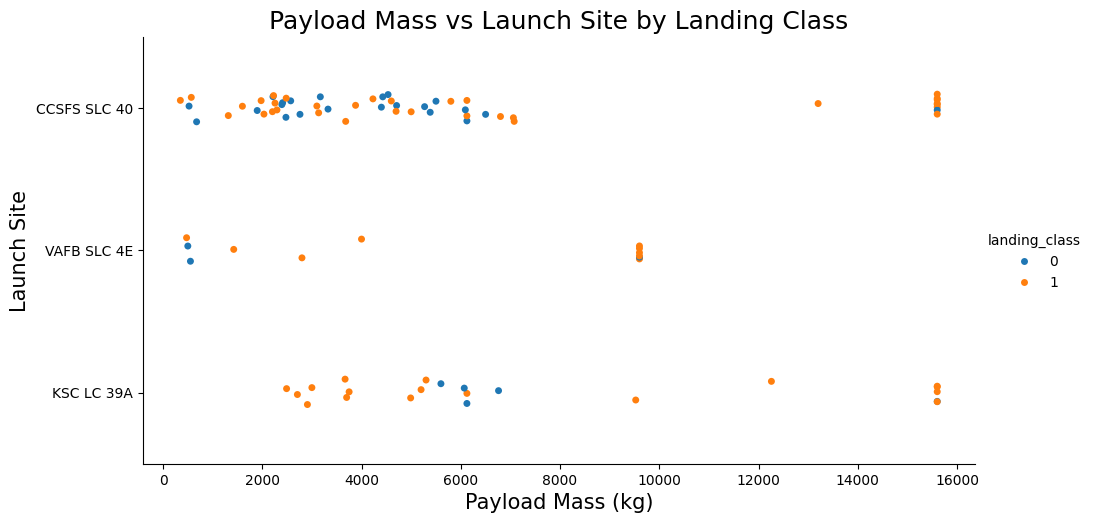

In [26]:
sns.catplot(
    x="payload_mass",  # Payload Mass (kg) on x-axis
    y="launch_site",   # Launch Site on y-axis
    hue="landing_class",  # Landing Class as hue (colors the points based on success/fail)
    kind="strip",       # 'strip' plot for individual points (you can also try 'swarm', 'box', etc.)
    data=df,           # Your dataset
    aspect=2,          # Makes the plot a bit wider
    jitter=True        # Adds jitter to avoid overlapping points
)

# Customize the plot labels and title
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass vs Launch Site by Landing Class", fontsize=18)
plt.show()

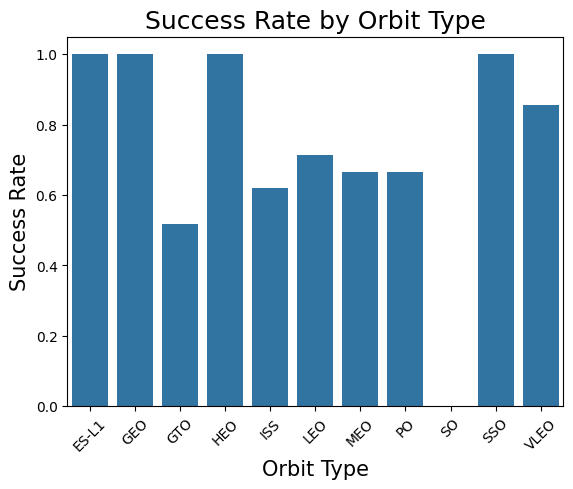

In [28]:
# Calculate the success rate for each orbit type
orbit_success_rate = df.groupby('orbit')['landing_class'].mean().reset_index()

# Create a bar plot to visualize success rate for each orbit type
sns.barplot(
    x='orbit',  # Orbit type on the x-axis
    y='landing_class',  # Success rate (mean of 'landing_class')
    data=orbit_success_rate,  # The calculated success rates
)

# Customize the plot labels and title
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=18)
plt.xticks(rotation=45)  # Rotate orbit labels for better visibility
plt.show()

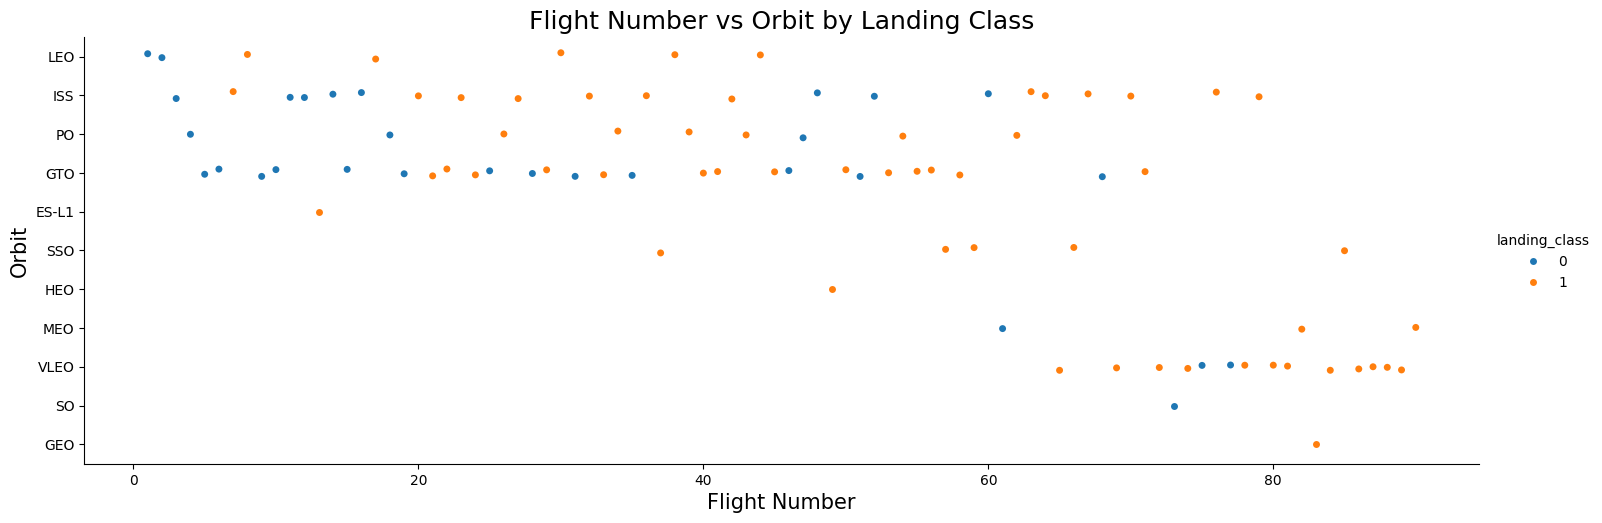

In [30]:
sns.catplot(
    x="flight_number",  # Flight Number on the x-axis
    y="orbit",           # Orbit type on the y-axis
    hue="landing_class",  # Landing Class as hue (colors the points based on success/fail)
    kind="strip",        # Use 'strip' for individual data points; you can also use 'swarm', 'box', 'bar', etc.
    data=df,             # Your dataset
    aspect=3,            # Aspect ratio to make the plot wider
    jitter=True          # Adds jitter to avoid overlapping points
)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Flight Number vs Orbit by Landing Class", fontsize=18)
plt.show()


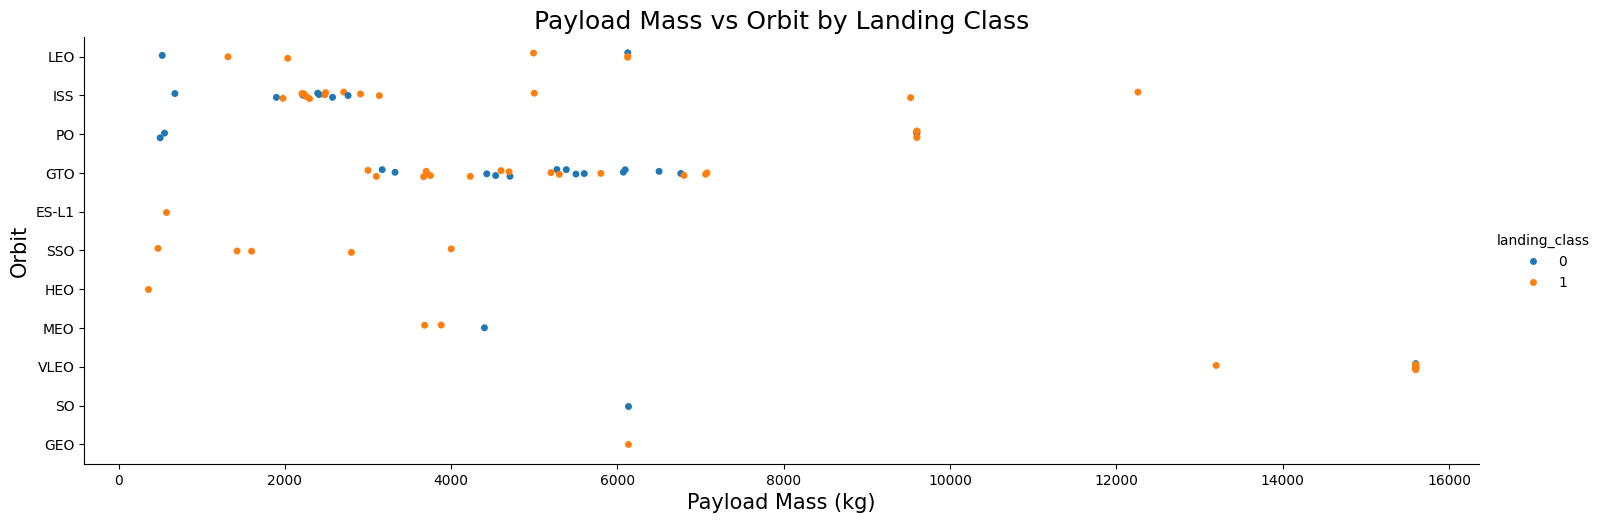

In [31]:
sns.catplot(
    x="payload_mass",  # Payload Mass on the x-axis
    y="orbit",          # Orbit type on the y-axis
    hue="landing_class",  # Landing Class as hue (colors the points based on success/fail)
    kind="strip",       # Use 'strip' for individual data points; you can also use 'swarm', 'box', 'bar', etc.
    data=df,            # Your dataset
    aspect=3,           # Aspect ratio to make the plot wider
    jitter=True         # Adds jitter to avoid overlapping points
)


plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Payload Mass vs Orbit by Landing Class", fontsize=18)
plt.show()

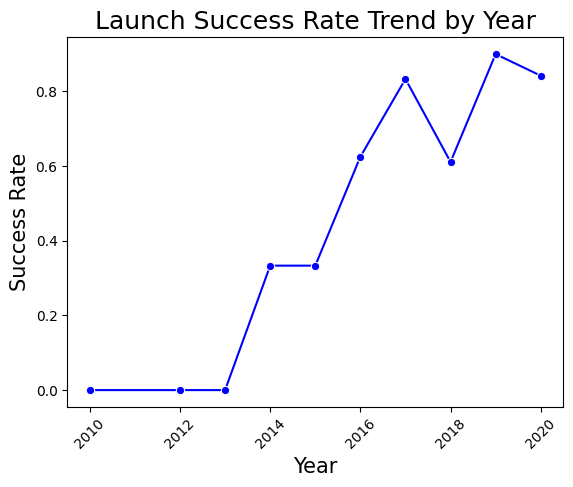

In [34]:
df['year'] = pd.to_datetime(df['date_utc']).dt.year

# Calculate the success rate per year (mean of landing_class)
yearly_success_rate = df.groupby('year')['landing_class'].mean().reset_index()

# Create a line plot to visualize the yearly success trend
sns.lineplot(
    x="year",               # Year on the x-axis
    y="landing_class",      # Success rate on the y-axis
    data=yearly_success_rate,  # The calculated yearly success rates
    marker='o',             # Marker for each data point
    color='b',              # Line color
)

# Customize the plot
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Launch Success Rate Trend by Year", fontsize=18)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [36]:
features = df[['flight_number', 'payload_mass', 'orbit', 'launch_site',
               'core_flights', 'core_gridfins', 'core_reused', 'core_legs',
               'core_landing_pad', 'core_block', 'core_reused_count', 'core_serial']]

features.head()

,flight_number,payload_mass,orbit,launch_site,core_flights,core_gridfins,core_reused,core_legs,core_landing_pad,core_block,core_reused_count,core_serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [39]:
features_one_hot = pd.get_dummies(features, columns=['orbit', 'launch_site', 'core_landing_pad', 'core_serial'], drop_first=False).astype(int)
features_one_hot.head()

,flight_number,payload_mass,core_flights,core_gridfins,core_reused,core_legs,core_block,core_reused_count,orbit_ES-L1,orbit_GEO,...,core_serial_B1048,core_serial_B1049,core_serial_B1050,core_serial_B1051,core_serial_B1054,core_serial_B1056,core_serial_B1058,core_serial_B1059,core_serial_B1060,core_serial_B1062
0,1,6123,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Convert the entire DataFrame to float64
features_one_hot = features_one_hot.astype('float64')

features_one_hot.head()


,flight_number,payload_mass,core_flights,core_gridfins,core_reused,core_legs,core_block,core_reused_count,orbit_ES-L1,orbit_GEO,...,core_serial_B1048,core_serial_B1049,core_serial_B1050,core_serial_B1051,core_serial_B1054,core_serial_B1056,core_serial_B1058,core_serial_B1059,core_serial_B1060,core_serial_B1062
0,1.0,6123.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)